In [32]:
import pandas as pd
import os
import numpy as np

In [133]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [36]:
data = pd.read_csv(r'../data/interim/train.csv')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [40]:
data.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841728      1.700255     87.888026      2.445913   
std     5992.46278      5.688133      0.087299     26.379767      0.533225   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.632000     66.000000      2.000000   
50%    10378.50000     22.810000      1.700000     84.060000      2.395000   
75%    15567.75000     26.000000      1.763000    111.600000      3.000000   
max    20757.00000     61.000000      1.976000    165.000000      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761339      2.029426      0.981752      0.616760  
std        0.705371      0.608486      0.838307      0.602116  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792000      0.008010      0.000000  
50%        3.000000      2.000000      1.000000      0.573700  
75%        3.000000      2.549000      1.588000      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [92]:
data.head()

id  Gender    Age  Height  Weight family_history_with_overweight FAVC  \
0   0    Male  24.44   1.700   81.70                            yes  yes   
1   1  Female  18.00   1.560   57.00                            yes  yes   
2   2  Female  18.00   1.712   50.16                            yes  yes   
3   3  Female  20.95   1.711  131.20                            yes  yes   
4   4    Male  31.64   1.914   93.80                            yes  yes   

    FCVC    NCP        CAEC SMOKE    CH2O SCC    FAF     TUE       CALC  \
0  2.000  2.982   Sometimes    no  2.7640  no  0.000  0.9766  Sometimes   
1  2.000  3.000  Frequently    no  2.0000  no  1.000  1.0000         no   
2  1.881  1.412   Sometimes    no  1.9100  no  0.866  1.6740         no   
3  3.000  3.000   Sometimes    no  1.6740  no  1.468  0.7803  Sometimes   
4  2.680  1.972   Sometimes    no  1.9795  no  1.968  0.9316  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [60]:
# Select categorical columns
#categorical_df = data.select_dtypes(include=['object'])
#categorical_df = categorical_df.drop('id', axis=1)
# Select numerical columns

numerical_df = data.select_dtypes(exclude=['object'])
print(len(numerical_df.columns))

9


In [88]:
data.columns.isna().sum()

np.int64(0)

In [76]:
data.CH2O.value_counts()

CH2O
2.000    6620
1.000    2804
3.000    1574
2.654     129
2.870     113
         ... 
1.570       1
2.678       1
1.027       1
2.127       1
1.780       1
Name: count, Length: 856, dtype: int64

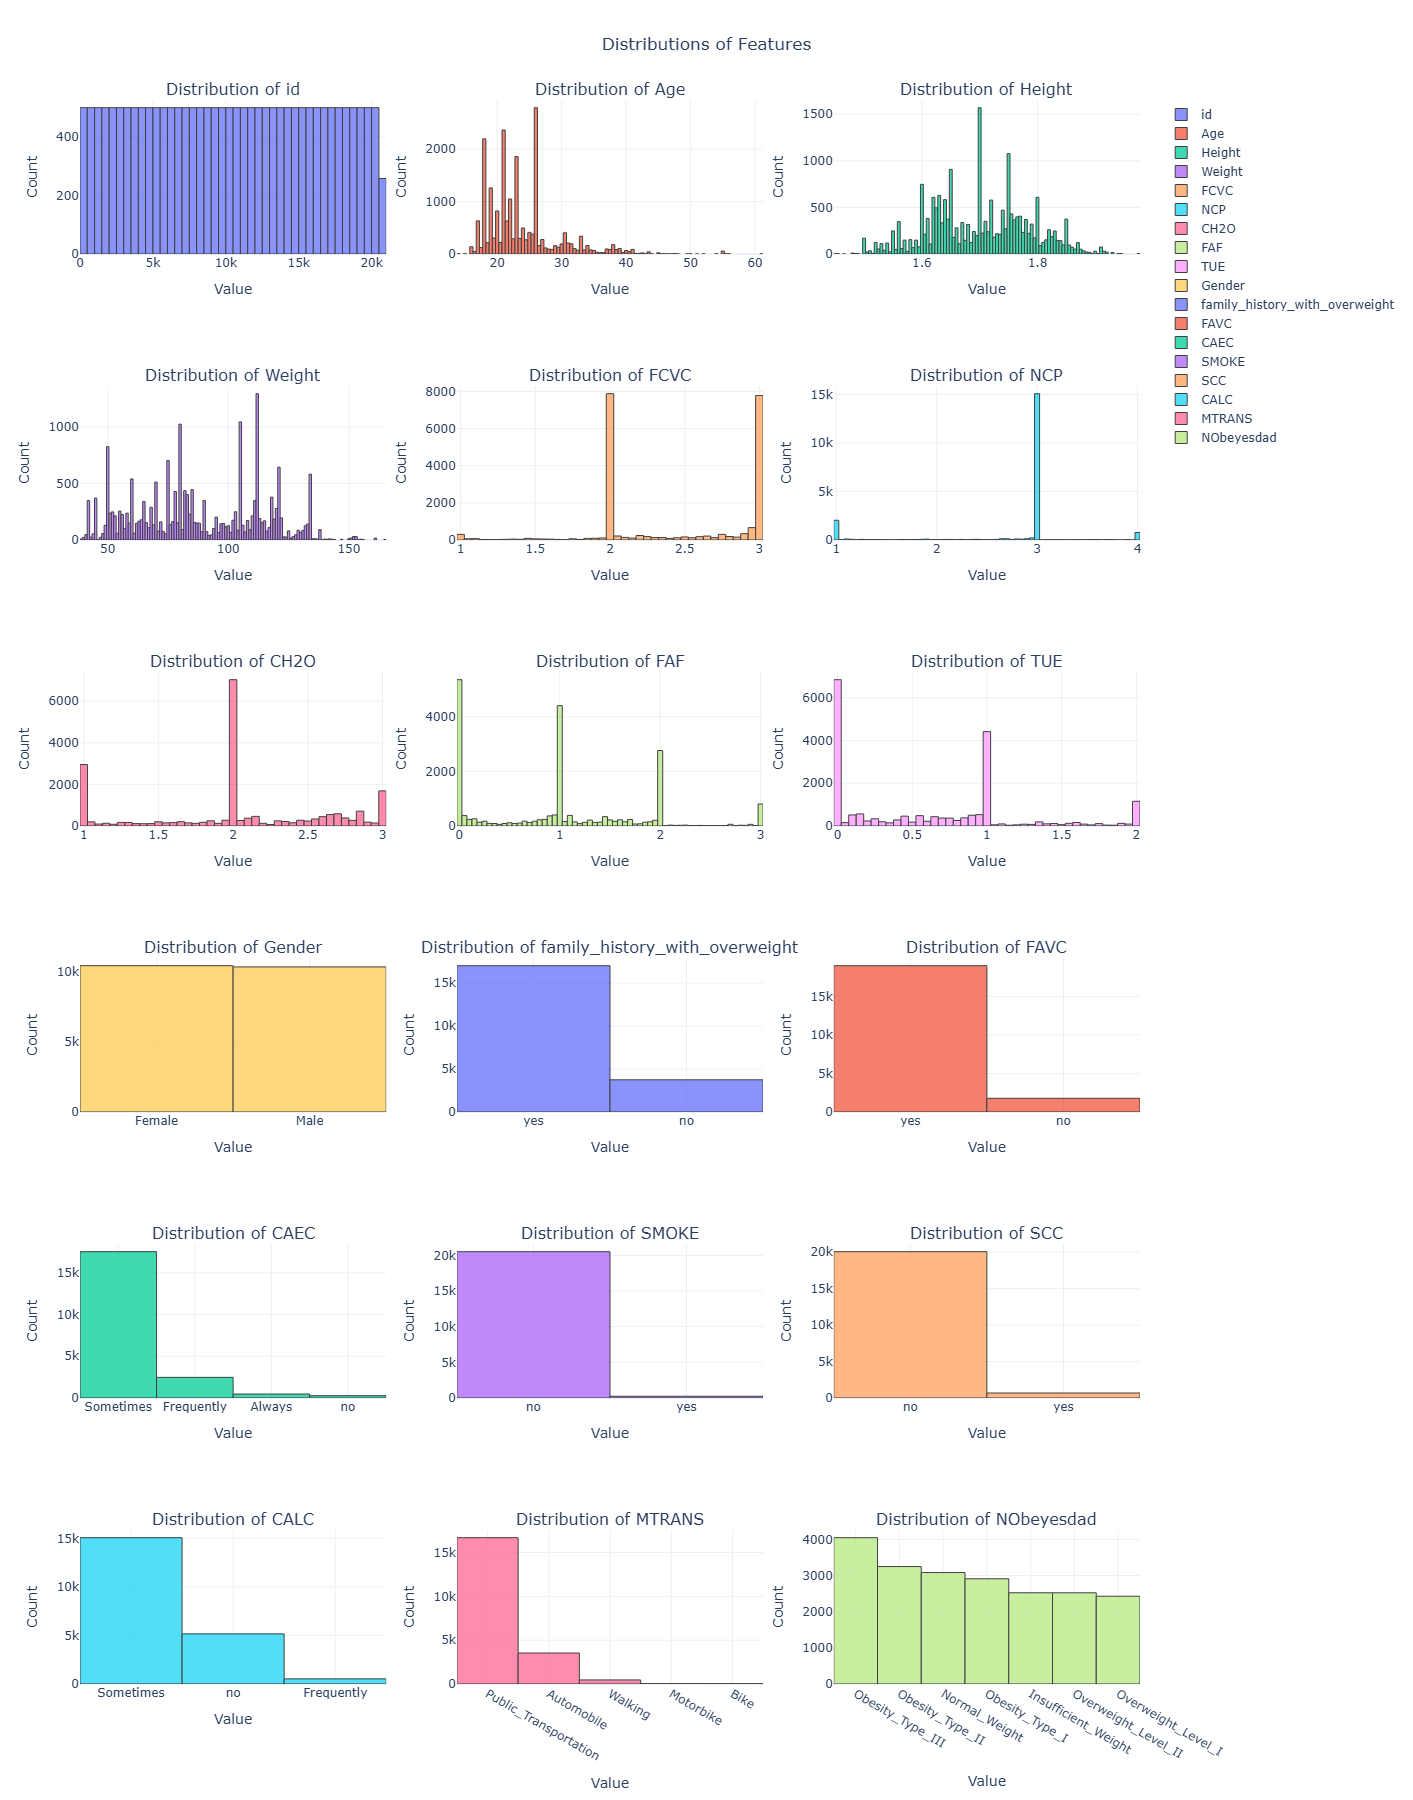

In [125]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as plt
import pandas as pd

# Function to create subplots for numerical and categorical features
def create_feature_subplots(df):
    # Separate numerical and categorical features
    numerical_df = df.select_dtypes(include=['number'])
    categorical_df = df.select_dtypes(include=['object', 'category'])
    
    # Calculate the total number of features
    total_features = len(numerical_df.columns) + len(categorical_df.columns)
    
    # Calculate the number of rows needed for the subplots (3 columns layout)
    num_rows = int(np.ceil(total_features / 3))
    
    # Create subplots
    fig = make_subplots(
        rows=num_rows, 
        cols=3, 
        subplot_titles=[f"Distribution of {col}" for col in numerical_df.columns] + [f"Distribution of {col}" for col in categorical_df.columns],
        shared_xaxes=False
    )
    
    # Color palette for plots
    colors = px.colors.qualitative.Plotly

    # Plot numerical features as histograms
    for i, col in enumerate(numerical_df.columns):
        # Calculate the correct row and column position
        row = (i // 3) + 1
        col_position = (i % 3) + 1
        
        # Add histogram trace without binning
        fig.add_trace(
            go.Histogram(
                x=numerical_df[col],
                name=col,
                marker=dict(color=colors[i % len(colors)], line=dict(width=1, color='black')),
                opacity=0.75,
                showlegend=True
            ),
            row=row,
            col=col_position
        )
        
    # Plot categorical features as bar plots
    start_index = len(numerical_df.columns)
    for j, col in enumerate(categorical_df.columns):
        # Calculate the correct row and column position
        row = ((start_index + j) // 3) + 1
        col_position = ((start_index + j) % 3) + 1
        
        # Calculate value counts for the categorical feature
        value_counts = categorical_df[col].value_counts()
        
        # Add bar trace
        fig.add_trace(
            go.Bar(
                x=value_counts.index,
                y=value_counts.values,
                name=col,
                marker=dict(color=colors[(start_index + j) % len(colors)], line=dict(width=1, color='black')),
                opacity=0.75,
                showlegend=True
            ),
            row=row,
            col=col_position
        )
    
    # Update layout for a better look
    fig.update_layout(
        height=300 * num_rows,
        width=1500,
        title_text="Distributions of Features",
        title_x=0.5,  # Center the title
        template='plotly_white'  # Use a clean template
    )
    
    # Update x-axis and y-axis titles
    fig.update_xaxes(title_text="Value", showgrid=True)
    fig.update_yaxes(title_text="Count", showgrid=True)

    fig.show()
    # Show the figure
    return fig
    

# Example usage:
# Assuming 'data' is your DataFrame with numerical and categorical features
fig = create_feature_subplots(data)


In [129]:
import matplotlib.pyplot as plt

<Axes: >

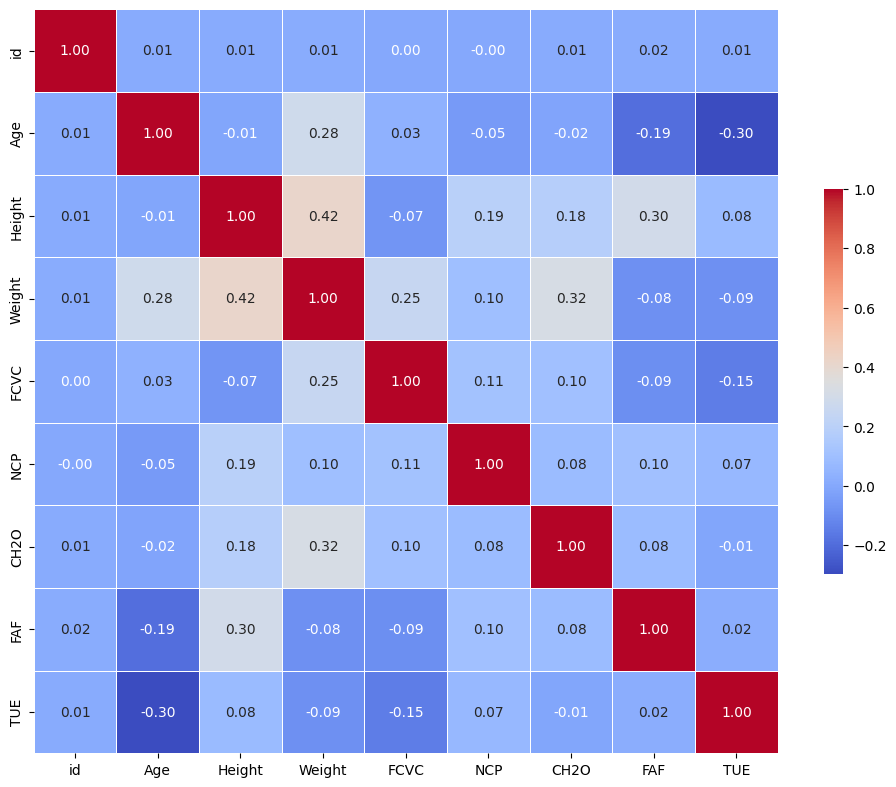

In [135]:
corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix, 
            annot=True,         # Show correlation coefficients
            fmt=".2f",          # Format the annotations to two decimal places
            cmap='coolwarm',    # Color map
            linewidths=0.5,     # Lines between squares
            square=True,        # Make squares
            cbar_kws={"shrink": .5})  # Color bar size

In [115]:
from sklearn.feature_selection import mutual_info_classif


In [183]:
data.head()

id  Gender    Age  Height  Weight family_history_with_overweight FAVC  \
0   0    Male  24.44   1.700   81.70                            yes  yes   
1   1  Female  18.00   1.560   57.00                            yes  yes   
2   2  Female  18.00   1.712   50.16                            yes  yes   
3   3  Female  20.95   1.711  131.20                            yes  yes   
4   4    Male  31.64   1.914   93.80                            yes  yes   

    FCVC    NCP        CAEC SMOKE    CH2O SCC    FAF     TUE       CALC  \
0  2.000  2.982   Sometimes    no  2.7640  no  0.000  0.9766  Sometimes   
1  2.000  3.000  Frequently    no  2.0000  no  1.000  1.0000         no   
2  1.881  1.412   Sometimes    no  1.9100  no  0.866  1.6740         no   
3  3.000  3.000   Sometimes    no  1.6740  no  1.468  0.7803  Sometimes   
4  2.680  1.972   Sometimes    no  1.9795  no  1.968  0.9316  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

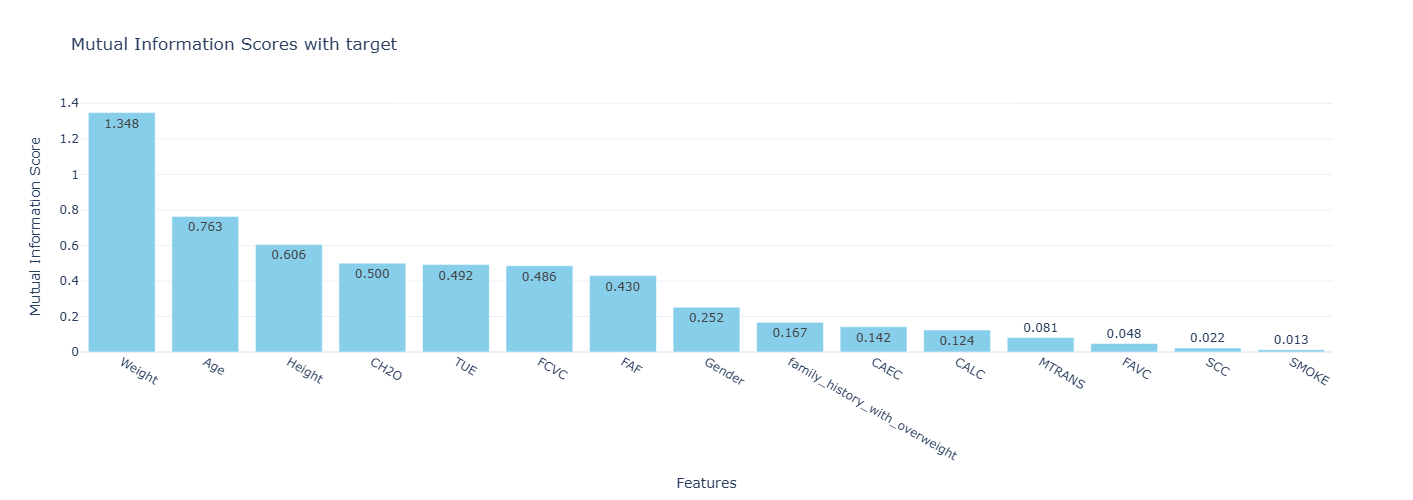

In [195]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

x = data.loc[:, ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = data.loc[:, 'NObeyesdad']

# Calculate mutual information for classification with automatic encoding for categorical features
def compute_mi_classification(X, y):
    X_encoded = X.copy()
    for col in X_encoded.select_dtypes(include=['object', 'category']).columns:
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))
    mi_scores = mutual_info_classif(X_encoded, y)
    # Create a dictionary with column names and their MI scores
    mi_dict = dict(zip(X.columns, mi_scores))
    mi_dict_sorted = dict(sorted(mi_dict.items(), key=lambda item: item[1], reverse=True))
    return mi_dict_sorted

# Example usage:
mi_scores = compute_mi_classification(x, y)

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(
        x=list(mi_scores.keys()),
        y=list(mi_scores.values()),
        marker=dict(color='skyblue'),
        text=[f"{v:.3f}" for v in mi_scores.values()],
        textposition='auto'
    )
])

# Update layout
fig.update_layout(
    title="Mutual Information Scores with target",
    xaxis_title="Features",
    yaxis_title="Mutual Information Score",
    template='plotly_white',
    height=500
)

# Show the figure
fig.show()

In [210]:
k = 6
x = x.copy()
for col in x.select_dtypes(include=['object', 'category']).columns:
    x[col] = LabelEncoder().fit_transform(x[col].astype(str))
        
selector = SelectKBest(mutual_info_classif, k=k)
features = selector.fit_transform(x, y)

features

array([[ 24.44  ,   1.7   ,  81.7   ,   2.    ,   2.764 ,   0.9766],
       [ 18.    ,   1.56  ,  57.    ,   2.    ,   2.    ,   1.    ],
       [ 18.    ,   1.712 ,  50.16  ,   1.881 ,   1.91  ,   1.674 ],
       ...,
       [ 20.1   ,   1.819 , 105.56  ,   2.408 ,   2.    ,   1.198 ],
       [ 33.84  ,   1.7   ,  83.5   ,   2.672 ,   2.145 ,   0.9736],
       [ 26.69  ,   1.816 , 118.1   ,   3.    ,   2.004 ,   0.714 ]])

# Es fehlt die pipeline!

In [223]:
x.columns[sel.get_support()]

NameError: name 'sel' is not defined

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

test = pd.read_csv(r'../data/raw/test.csv')

x_test = test

# Initialize and train the ExtraTreesClassifier
mdl = ExtraTreesClassifier(n_estimators=50)
mdl.fit(x, y)

# Select features using the trained model and a mean threshold
model = SelectFromModel(mdl, prefit=True, threshold='mean')
x_new = model.transform(x)  # Transformed training data

# Display selected features
selected_features = x.columns[model.get_support()]
print(f"Selected Features: {selected_features}")

# Transform the test set with the same selected features
x_test_new = model.transform(x_test)

# Make predictions on the test set
y_pred = mdl.predict(x_test_new)

# Calculate and print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Selected Features: Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC'], dtype='object')


C:\Users\Administrator\Desktop\raphi_other\repositories\template_project\.envs\dev_env\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

C:\Users\Administrator\Desktop\raphi_other\repositories\template_project\.envs\dev_env\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



IndexError: boolean index did not match indexed array along axis 1; size of axis is 17 but size of corresponding boolean axis is 15